# Breast Cancer Diagnostic
## The goal of this project is to build a model able to predict the diagnosis of breast cancer tissues as malignant or benign. 

- Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

- Class distribution: 357 benign, 212 malignant. More info about this dataset here

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import (roc_auc_score, confusion_matrix, recall_score, precision_score, RocCurveDisplay, 
                             accuracy_score, plot_confusion_matrix, auc)
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
import plotly.express as px

In [14]:
# import data
X= pd.read_csv("X.csv")
y=pd.read_csv("y.csv")
y=y.values.ravel()

## Logistic Regression

In [15]:
#dropping based on dec tree feature importance and multicollinearity
xMean=X.iloc[:,0:10].copy().drop(["perimeter_mean", "area_mean", "concave points_mean", "compactness_mean"], axis=1)
xSE=X.iloc[:,10:20].copy().drop(["perimeter_se", "radius_se", "concavity_se", "compactness_se"], axis=1)
xWorst=X.iloc[:,20:30].copy().drop(["perimeter_worst", "area_worst", "concavity_worst", "concave points_worst", 'fractal_dimension_worst'], axis=1)

In [16]:
# plt.figure(figsize=(20,10))
# sns.heatmap(xWorst.corr(),linewidths=.1,cmap="YlGnBu", annot=True, fmt= '.1f')
# plt.yticks(rotation=0);

### Worst Variables

In [18]:
X_train, X_test, y_train, y_test = train_test_split(xWorst, y, test_size=0.30, random_state=random)

In [19]:
lr= LogisticRegression(random_state=random)
lr= lr.fit(X_train, y_train)
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)
print("Training Accuracy: ", lr.score(X_train, y_train))
print("Test Accuracy: ", lr.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

Training Accuracy:  0.949748743718593
Test Accuracy:  0.9649122807017544
Training ROC_AUC:  0.9423196140265762
Test ROC_AUC:  0.958994708994709


## Tuning

In [20]:
# define models and parameters
# define grid search
param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear'], 
            'penalty':['l2'],
            'C':[100, 10, 1.0, 0.1, 0.01, 1000],
           'max_iter': [5000]}

#why? keep the balance in the splits
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(lr, param_grid, cv=cv, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

LogisticRegression(C=1000, max_iter=5000, random_state=42, solver='newton-cg')


0.9884126984126984

In [21]:
# define models and parameters
# define grid search
param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear'], 
            'penalty':['l2'],
            'C':[900, 1000,2000,3000,3100, 3500],
           'max_iter': [5000]}

#why? keep the balance in the splits
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(lr, param_grid, cv=cv, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

LogisticRegression(C=3000, max_iter=5000, random_state=42, solver='newton-cg')


0.9886857142857143

In [22]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_penalty,param_solver,params,split0_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
9,0.028677,0.003708,0.002601,0.000489,3000,5000,l2,newton-cg,"{'C': 3000, 'max_iter': 5000, 'penalty': 'l2',...",0.994667,...,0.978667,1.0,1.0,1.0,1.0,0.948571,1.0,0.988686,0.017795,1
10,0.026045,0.005020,0.002999,0.000683,3000,5000,l2,lbfgs,"{'C': 3000, 'max_iter': 5000, 'penalty': 'l2',...",0.994667,...,0.978667,1.0,1.0,1.0,1.0,0.948571,1.0,0.988686,0.017795,1
12,0.029338,0.004123,0.002798,0.000542,3100,5000,l2,newton-cg,"{'C': 3100, 'max_iter': 5000, 'penalty': 'l2',...",0.994667,...,0.978667,1.0,1.0,1.0,1.0,0.948571,1.0,0.988686,0.017795,1
13,0.022875,0.003140,0.002535,0.000498,3100,5000,l2,lbfgs,"{'C': 3100, 'max_iter': 5000, 'penalty': 'l2',...",0.994667,...,0.978667,1.0,1.0,1.0,1.0,0.948571,1.0,0.988686,0.017795,1
8,0.003268,0.000511,0.002338,0.000468,2000,5000,l2,liblinear,"{'C': 2000, 'max_iter': 5000, 'penalty': 'l2',...",0.994667,...,0.976000,1.0,1.0,1.0,1.0,0.948571,1.0,0.988597,0.017851,5
6,0.029470,0.004110,0.002843,0.000749,2000,5000,l2,newton-cg,"{'C': 2000, 'max_iter': 5000, 'penalty': 'l2',...",0.994667,...,0.976000,1.0,1.0,1.0,1.0,0.948571,1.0,0.988597,0.017851,5
7,0.024180,0.005602,0.002901,0.000651,2000,5000,l2,lbfgs,"{'C': 2000, 'max_iter': 5000, 'penalty': 'l2',...",0.994667,...,0.976000,1.0,1.0,1.0,1.0,0.948571,1.0,0.988597,0.017851,5
15,0.029113,0.003838,0.002567,0.000667,3500,5000,l2,newton-cg,"{'C': 3500, 'max_iter': 5000, 'penalty': 'l2',...",0.994667,...,0.978667,1.0,1.0,1.0,1.0,0.945714,1.0,0.988502,0.017979,8
2,0.003266,0.000510,0.002368,0.000607,900,5000,l2,liblinear,"{'C': 900, 'max_iter': 5000, 'penalty': 'l2', ...",0.994667,...,0.973333,1.0,1.0,1.0,1.0,0.945714,1.0,0.988502,0.018201,8
16,0.023341,0.004220,0.002767,0.000558,3500,5000,l2,lbfgs,"{'C': 3500, 'max_iter': 5000, 'penalty': 'l2',...",0.994667,...,0.978667,1.0,1.0,1.0,1.0,0.945714,1.0,0.988502,0.017979,8


In [23]:
lr= LogisticRegression(C=3000, solver='newton-cg', random_state=random, max_iter=5000)
lr= lr.fit(X_train, y_train)
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9723618090452262
0.9707602339181286
Training ROC_AUC:  0.9684779386000378
Test ROC_AUC:  0.9702380952380952


Accuracy : 97.08
precision : 95.31
recall : 96.83


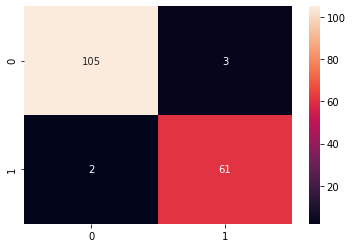

In [24]:
print('Accuracy :', round(accuracy_score(y_test,y_test_pred)*100,2))
print('precision :', round(precision_score(y_test,y_test_pred)*100,2))
print('recall :', round(recall_score(y_test,y_test_pred)*100,2))

cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm,annot=True,fmt="d");

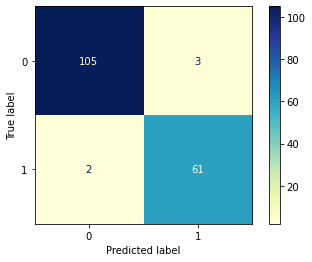

In [25]:
plot_confusion_matrix(lr, X_test, y_test, cmap='YlGnBu')
plt.show()

Text(0.5, 0, 'False Positive Rate')

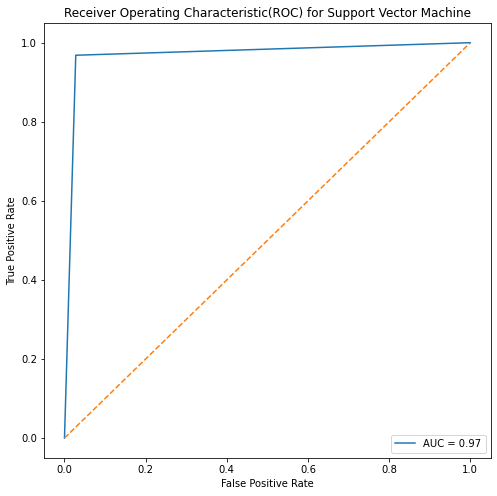

In [26]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
# Draw ROC curve:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label="AUC = %0.2f"%auc_sc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc='lower right')
plt.title("Receiver Operating Characteristic(ROC) for Support Vector Machine")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

In [27]:
lr= LogisticRegression(C=3100, solver='liblinear', random_state=random)
lr= lr.fit(X_train, y_train)
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)
print("Training Score: ",lr.score(X_train, y_train))
print("Test Score: ", lr.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

Training Score:  0.9698492462311558
Test Score:  0.9707602339181286
Training ROC_AUC:  0.9651222339020512
Test ROC_AUC:  0.9702380952380952


### LASSO Tuning

In [92]:
# define models and parameters
# define grid search
param_grid={'solver': ['liblinear'], 
            'penalty':['l1'],
            'C':[100, 10, 1.0, 0.1, 0.01, 1000],
           'max_iter': [5000]}

#why? keep the balance in the splits
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(lr, param_grid, cv=cv, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

LogisticRegression(C=100, max_iter=5000, penalty='l1', random_state=42,
                   solver='liblinear')


0.9880507936507936

In [93]:
lr= LogisticRegression(penalty='l1', C=100, solver='liblinear', random_state=random)
lr= lr.fit(X_train, y_train)
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)
print("Training Score: ",lr.score(X_train, y_train))
print("Test Score: ", lr.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

Training Score:  0.9698492462311558
Test Score:  0.9707602339181286
Training ROC_AUC:  0.9651222339020512
Test ROC_AUC:  0.9702380952380952


## Naive Bayes

In [326]:
from sklearn.naive_bayes import GaussianNB
#normal data helped this
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
y_train_pred=gnb.predict(X_train)
y_test_pred=gnb.predict(X_test)
print(gnb.score(X_train, y_train))
print(gnb.score(X_test, y_test))
print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.949748743718593
0.9473684210526315
Training RMSE:  0.22416791983111017
Test RMSE:  0.22941573387056177
Training ROC_AUC:  0.9436672865960487
Test ROC_AUC:  0.9417989417989417


#### Bernoulli

In [327]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf = clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.6256281407035176
0.631578947368421
Training RMSE:  0.6118593460073013
Test RMSE:  0.6069769786668839
Training ROC_AUC:  0.5
Test ROC_AUC:  0.5


### Tuning

In [314]:
param_grid= {'var_smoothing': np.logspace(0,-9, num=100)
        }
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(gnb, param_grid, cv=cv, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

GaussianNB(var_smoothing=6.579332246575683e-05)


0.9898603174603174

var_smoothing is a stability calculation to widen (or smooth) the curve and therefore account for more samples that are further away from the distribution mean. In this case, np.logspace returns numbers spaced evenly on a log scale, starts from 0, ends at -9, and generates 100 samples.
from https://medium.com/analytics-vidhya/how-to-improve-naive-bayes-9fa698e14cba

In [315]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
46,0.002467,0.000670,0.002833,0.000934,6.57933e-05,{'var_smoothing': 6.579332246575683e-05},1.0,1.000000,1.0,0.960000,...,0.981333,1.000000,1.0,1.0,1.0,0.957143,1.000000,0.989860,0.016686,1
47,0.002467,0.000669,0.002901,0.000700,5.3367e-05,{'var_smoothing': 5.3366992312063123e-05},1.0,1.000000,1.0,0.960000,...,0.981333,1.000000,1.0,1.0,1.0,0.957143,1.000000,0.989860,0.016686,1
45,0.002466,0.000499,0.002500,0.000500,8.11131e-05,{'var_smoothing': 8.111308307896872e-05},1.0,1.000000,1.0,0.962667,...,0.981333,1.000000,1.0,1.0,1.0,0.954286,1.000000,0.989765,0.016667,3
48,0.002167,0.000372,0.002700,0.000458,4.32876e-05,{'var_smoothing': 4.328761281083062e-05},1.0,1.000000,1.0,0.957333,...,0.978667,0.997333,1.0,1.0,1.0,0.957143,1.000000,0.989594,0.016869,4
44,0.002367,0.000546,0.002700,0.000526,0.0001,{'var_smoothing': 0.0001},1.0,0.997333,1.0,0.962667,...,0.978667,1.000000,1.0,1.0,1.0,0.954286,1.000000,0.989587,0.016297,5
42,0.002467,0.000670,0.002567,0.000615,0.000151991,{'var_smoothing': 0.0001519911082952933},1.0,0.997333,1.0,0.970667,...,0.973333,1.000000,1.0,1.0,1.0,0.957143,0.997222,0.989501,0.015605,6
43,0.002433,0.000615,0.002767,0.000423,0.000123285,{'var_smoothing': 0.0001232846739442066},1.0,0.997333,1.0,0.968000,...,0.976000,1.000000,1.0,1.0,1.0,0.954286,0.997222,0.989495,0.015861,7
49,0.002233,0.000422,0.002701,0.000458,3.51119e-05,{'var_smoothing': 3.511191734215127e-05},1.0,1.000000,1.0,0.957333,...,0.978667,0.997333,1.0,1.0,1.0,0.957143,1.000000,0.989323,0.016763,8
41,0.002300,0.000459,0.002634,0.000482,0.000187382,{'var_smoothing': 0.0001873817422860383},1.0,0.997333,1.0,0.970667,...,0.973333,1.000000,1.0,1.0,1.0,0.954286,0.997222,0.989317,0.015727,9
50,0.002400,0.000554,0.002367,0.000482,2.84804e-05,{'var_smoothing': 2.848035868435799e-05},1.0,1.000000,1.0,0.957333,...,0.976000,0.997333,1.0,1.0,1.0,0.957143,1.000000,0.989146,0.016677,10


In [386]:
gnb = GaussianNB(var_smoothing=6.579332246575683e-05)
gnb = gnb.fit(X_train, y_train)
y_train_pred=gnb.predict(X_train)
y_test_pred=gnb.predict(X_test)
print(gnb.score(X_train, y_train))
print(gnb.score(X_test, y_test))
print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9698492462311558
0.9766081871345029
Training RMSE:  0.1736397240519698
Test RMSE:  0.1529438225803745
Training ROC_AUC:  0.9610792161936336
Test ROC_AUC:  0.9682539682539683


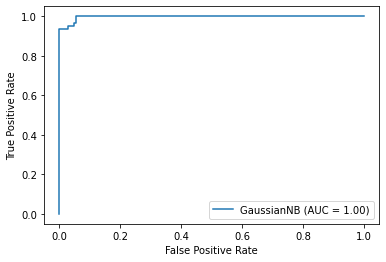

In [390]:
plot_roc_curve(gnb, X_test, y_test)

## KNN

In [391]:
from sklearn.neighbors import KNeighborsClassifier
#KNN is more sensititve to noise
transformer = RobustScaler().fit(xWorst)
X_scaled=transformer.transform(xWorst)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(xWorst, y, test_size=0.30, random_state=random)
#scaling didn't help*****************************
knn=KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_train_prediction=knn.predict(X_train_scaled)
y_prediction=knn.predict(X_test_scaled)
print(knn.score(X_train_scaled, y_train))
print(knn.score(X_test_scaled, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9422110552763819
0.9473684210526315
Training ROC_AUC:  0.9610792161936336
Test ROC_AUC:  0.9682539682539683


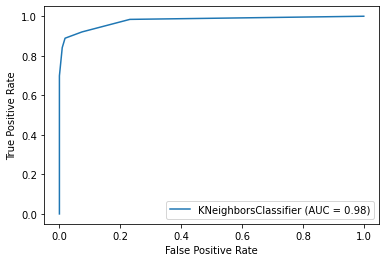

In [392]:
plot_roc_curve(knn, X_test, y_test)

### Tuning

In [330]:
param_grid= {'n_neighbors': np.arange(1,40),
            'p':[1,2]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(knn, param_grid, cv=cv, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

KNeighborsClassifier(n_neighbors=28, p=1)


0.9776624338624339

In [331]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
54,0.002700,0.000781,0.003801,0.000600,28,1,"{'n_neighbors': 28, 'p': 1}",0.980000,0.958667,0.996000,...,0.944000,0.984000,0.998667,1.000000,0.998667,0.915714,1.000000,0.977662,0.023088,1
52,0.003133,0.000670,0.004634,0.000949,27,1,"{'n_neighbors': 27, 'p': 1}",0.988000,0.960000,0.996000,...,0.944000,0.981333,0.998667,1.000000,1.000000,0.888571,0.998611,0.977385,0.025139,2
56,0.002601,0.000663,0.003767,0.000803,29,1,"{'n_neighbors': 29, 'p': 1}",0.981333,0.957333,0.996000,...,0.946667,0.984000,0.997333,0.997333,1.000000,0.910000,1.000000,0.976930,0.023602,3
60,0.002666,0.000745,0.003867,0.000763,31,1,"{'n_neighbors': 31, 'p': 1}",0.977333,0.956000,0.996000,...,0.944000,0.980000,0.997333,0.993333,1.000000,0.907143,1.000000,0.976921,0.023630,4
66,0.002433,0.000495,0.003700,0.000737,34,1,"{'n_neighbors': 34, 'p': 1}",0.966667,0.958667,0.996000,...,0.941333,0.985333,0.997333,0.994667,0.997333,0.905714,1.000000,0.976806,0.024479,5
58,0.002566,0.000716,0.004101,0.001165,30,1,"{'n_neighbors': 30, 'p': 1}",0.981333,0.958667,0.996000,...,0.945333,0.981333,0.997333,0.994667,1.000000,0.910000,1.000000,0.976797,0.023984,6
50,0.002666,0.000789,0.003934,0.000814,26,1,"{'n_neighbors': 26, 'p': 1}",0.989333,0.960000,0.997333,...,0.945333,0.980000,1.000000,1.000000,0.998667,0.891429,1.000000,0.976675,0.026449,7
64,0.002733,0.000814,0.004068,0.001124,33,1,"{'n_neighbors': 33, 'p': 1}",0.970667,0.956000,0.996000,...,0.941333,0.985333,0.997333,0.992000,0.997333,0.908571,1.000000,0.976629,0.024051,8
68,0.002567,0.000761,0.004000,0.001000,35,1,"{'n_neighbors': 35, 'p': 1}",0.969333,0.960000,0.997333,...,0.940000,0.985333,0.996000,0.989333,0.997333,0.904286,1.000000,0.976626,0.025118,9
62,0.002800,0.000791,0.004100,0.001248,32,1,"{'n_neighbors': 32, 'p': 1}",0.974667,0.956000,0.998667,...,0.941333,0.982667,0.997333,0.992000,0.998667,0.901429,1.000000,0.976517,0.024589,10


In [332]:
knn=KNeighborsClassifier(n_neighbors=28, p=1)
knn.fit(X_train, y_train)
y_train_prediction=knn.predict(X_train)
y_prediction=knn.predict(X_test)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))


0.9221105527638191
0.9415204678362573
Training ROC_AUC:  0.9610792161936336
Test ROC_AUC:  0.9682539682539683


In [333]:
knn=KNeighborsClassifier(n_neighbors=34, p=1)
knn.fit(X_train, y_train)
y_train_prediction=knn.predict(X_train)
y_prediction=knn.predict(X_test)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9246231155778895
0.9473684210526315
Training ROC_AUC:  0.9610792161936336
Test ROC_AUC:  0.9682539682539683


## SVM

In [336]:
#SVM
from sklearn.svm import SVC
clf = SVC()
clf = clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9195979899497487
0.9415204678362573
Training ROC_AUC:  0.8980081399423196
Test ROC_AUC:  0.9272486772486772


In [226]:
clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### Tuning

In [337]:
param_grid= {'kernel' : ['poly', 'rbf', 'sigmoid'],
             'C' : [50, 10, 1.0, 0.1, 0.01],
             'gamma' : ['scale']}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(clf, param_grid, cv=cv , scoring="roc_auc")
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

SVC(C=50, kernel='poly')


0.9829529100529102

In [338]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004700,0.001069,0.003534,0.000956,50,scale,poly,"{'C': 50, 'gamma': 'scale', 'kernel': 'poly'}",1.000000,0.989333,...,0.960000,0.992000,1.000000,1.000000,1.000000,0.920000,1.000000,0.982953,0.020047,1
4,0.003633,0.001168,0.002900,0.000790,10,scale,rbf,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.989333,0.986667,...,0.957333,0.981333,0.997333,1.000000,1.000000,0.925714,0.997222,0.981269,0.019002,2
1,0.003433,0.000715,0.002600,0.000664,50,scale,rbf,"{'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}",0.994667,0.984000,...,0.957333,0.989333,1.000000,1.000000,0.997333,0.925714,0.997222,0.981084,0.018827,3
6,0.003066,0.000442,0.002567,0.000496,1,scale,poly,"{'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}",0.992000,0.984000,...,0.957333,0.984000,0.997333,0.994667,1.000000,0.922857,1.000000,0.980828,0.020175,4
3,0.003433,0.000668,0.002533,0.000562,10,scale,poly,"{'C': 10, 'gamma': 'scale', 'kernel': 'poly'}",0.992000,0.984000,...,0.957333,0.984000,0.997333,1.000000,1.000000,0.922857,1.000000,0.980624,0.019626,5
7,0.003499,0.000671,0.002701,0.000458,1,scale,rbf,"{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}",0.986667,0.973333,...,0.957333,0.984000,0.997333,0.997333,1.000000,0.911429,0.997222,0.980081,0.021249,6
9,0.002933,0.000443,0.002500,0.000500,0.1,scale,poly,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}",0.989333,0.949333,...,0.960000,0.981333,0.997333,0.976000,1.000000,0.928571,1.000000,0.979143,0.019523,7
10,0.004332,0.000537,0.002902,0.000539,0.1,scale,rbf,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}",0.970667,0.938667,...,0.952000,0.978667,0.989333,0.981333,1.000000,0.917143,1.000000,0.974888,0.022002,8
13,0.005866,0.000990,0.003635,0.001016,0.01,scale,rbf,"{'C': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}",0.962667,0.917333,...,0.949333,0.976000,0.986667,0.960000,0.997333,0.914286,1.000000,0.970474,0.022087,9
12,0.004933,0.000998,0.003568,0.000919,0.01,scale,poly,"{'C': 0.01, 'gamma': 'scale', 'kernel': 'poly'}",0.946667,0.877333,...,0.941333,0.962667,0.981333,0.930667,0.986667,0.905714,0.986111,0.957450,0.025718,10


In [339]:
clf = SVC(C=50, kernel='poly')
clf = clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9472361809045227
0.9590643274853801
Training ROC_AUC:  0.9389639093285894
Test ROC_AUC:  0.9543650793650793


In [340]:
clf = SVC(C=10, kernel='poly')
clf = clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9321608040201005
0.9532163742690059
Training ROC_AUC:  0.9228726988490876
Test ROC_AUC:  0.9497354497354498


## PLS Regression

In [25]:
X_train_full, X_test_full, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown = 'ignore',sparse=False)
trainy_p = enc.fit_transform(y_train.to_numpy().reshape(-1,1))
testy_p = enc.transform(y_test.to_numpy().reshape(-1,1))

pls=PLSRegression(n_components=8)
pls.fit(X_train_full, trainy_p)
y_train_pred=pls.predict(X_train_full)
#print(y_train_pred)
y_test_pred=pls.predict(X_test_full)
print(pls.score(X_train_full, trainy_p))
print(pls.score(X_test_full, testy_p))

0.7663739411866044
0.7428791076062855


In [26]:
y_test_pred[:,1]

array([ 0.33941848,  0.82247677,  0.72304763, -0.05403946, -0.13889642,
        1.63842282,  1.25964924,  0.5593925 ,  0.58157642,  0.0649855 ,
        0.19050589,  0.65443225,  0.10422365,  0.49122839,  0.08993242,
        0.83643059,  0.11382774, -0.18876128, -0.44817639,  0.94804801,
        0.34017233,  0.10343666,  1.35526776, -0.11992418,  0.03813068,
        0.17937062,  0.08450634,  0.2262079 ,  0.0284011 ,  1.05511498,
       -0.02382478, -0.00833233,  0.19627962,  0.05483098, -0.05068765,
        0.18591114,  0.52176524,  0.30340465,  0.80883849,  0.19293505,
       -0.16054904,  0.8827977 ,  0.07510889, -0.00405496,  0.5368415 ,
        0.22861266,  0.01511657,  0.0938028 ,  0.14926136, -0.00177114,
        0.7985145 ,  1.18027993,  0.39208475,  0.3699705 , -0.10522685,
        0.15536076,  0.04114256,  1.4617453 ,  0.61825245, -0.01327722,
        0.10313582,  1.16622132,  1.33430912,  0.15828871,  0.03929542,
        0.4173121 ,  1.04950373,  1.13624015,  0.0178229 ,  0.22

## Decision trees

In [348]:
# Decision trees
from sklearn import tree
clf=tree.DecisionTreeClassifier(random_state=42)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

1.0
0.9415204678362573
Training RMSE:  0.0
Test RMSE:  0.2418254167033372
Training ROC_AUC:  1.0
Test ROC_AUC:  0.9437830687830688


In [349]:
X_train_full, X_test_full, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=random)
# Decision trees
from sklearn import tree
clf_tree=tree.DecisionTreeClassifier(random_state=42)
clf_tree=clf_tree.fit(X_train_full, y_train)
y_train_pred=clf_tree.predict(X_train_full)
y_test_pred=clf_tree.predict(X_test_full)
print(clf_tree.score(X_train_full, y_train))
print(clf_tree.score(X_test_full, y_test))

print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

1.0
0.9415204678362573
Training RMSE:  0.0
Test RMSE:  0.2418254167033372
Training ROC_AUC:  1.0
Test ROC_AUC:  0.9437830687830688


### Tuning

In [350]:
maxDepth=clf.tree_.max_depth
param_grid = {'max_depth':range(1, maxDepth+1),
              'max_features':[0.2,0.4,0.6,0.8], 
              'max_leaf_nodes':[20,30,40,50],
             'min_samples_leaf': [1,2,5,10]}
clf = tree.DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(clf, param_grid, cv=cv , scoring="roc_auc")
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
grid_search.best_score_

{'max_depth': 9, 'max_features': 0.6, 'max_leaf_nodes': 40, 'min_samples_leaf': 10}


0.9751825396825399

In [351]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_leaf,params,split0_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
555,0.002570,0.000618,0.002531,0.000766,9,0.6,40,10,"{'max_depth': 9, 'max_features': 0.6, 'max_lea...",1.000000,...,0.956000,0.965333,0.948000,0.997333,0.994667,0.907143,0.987500,0.975183,0.023286,1
563,0.002600,0.000611,0.002489,0.000556,9,0.8,20,10,"{'max_depth': 9, 'max_features': 0.8, 'max_lea...",0.989333,...,0.962667,0.956000,0.974667,0.997333,0.994667,0.905714,0.994444,0.974895,0.023623,2
507,0.002833,0.000820,0.002534,0.000670,8,0.8,40,10,"{'max_depth': 8, 'max_features': 0.8, 'max_lea...",0.997333,...,0.993333,0.960000,0.964000,1.000000,0.994667,0.900000,0.973611,0.974724,0.027291,3
379,0.002700,0.000458,0.002434,0.000496,6,0.8,40,10,"{'max_depth': 6, 'max_features': 0.8, 'max_lea...",0.993333,...,0.956000,0.994667,0.937333,1.000000,0.969333,0.944286,0.986111,0.972661,0.024171,4
503,0.002695,0.000935,0.002467,0.000562,8,0.8,30,10,"{'max_depth': 8, 'max_features': 0.8, 'max_lea...",1.000000,...,0.957333,0.994667,0.950667,0.970667,0.952000,0.905714,0.986111,0.971325,0.030036,5
231,0.002466,0.000561,0.002569,0.000559,4,0.6,30,10,"{'max_depth': 4, 'max_features': 0.6, 'max_lea...",0.990667,...,0.952000,0.965333,0.974667,0.993333,0.994667,0.938571,0.988889,0.970907,0.026905,6
383,0.002700,0.000458,0.002367,0.000482,6,0.8,50,10,"{'max_depth': 6, 'max_features': 0.8, 'max_lea...",0.997333,...,0.953333,1.000000,0.964000,0.970667,0.984000,0.910000,0.986111,0.970777,0.025163,7
499,0.002500,0.000563,0.002500,0.000619,8,0.8,20,10,"{'max_depth': 8, 'max_features': 0.8, 'max_lea...",0.978667,...,0.950667,0.922667,0.926667,0.970667,0.972000,0.970000,0.994444,0.970275,0.027695,8
311,0.002533,0.000499,0.002467,0.000499,5,0.8,30,10,"{'max_depth': 5, 'max_features': 0.8, 'max_lea...",0.998667,...,0.932000,0.984000,0.918667,0.972000,0.969333,0.978571,0.979167,0.970223,0.024462,9
443,0.002667,0.000537,0.002466,0.000499,7,0.8,40,10,"{'max_depth': 7, 'max_features': 0.8, 'max_lea...",1.000000,...,0.957333,0.956000,0.976000,0.970667,0.937333,0.897143,0.991667,0.969390,0.028835,10


In [353]:
clf=tree.DecisionTreeClassifier(max_depth= 9, max_features= 0.6, max_leaf_nodes= 40, min_samples_leaf= 10)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.949748743718593
0.9415204678362573
Training RMSE:  0.22416791983111017
Test RMSE:  0.2418254167033372
Training ROC_AUC:  0.9328859060402684
Test ROC_AUC:  0.9305555555555556


##### FULL

In [354]:
maxDepth=clf_tree.tree_.max_depth
param_grid = {'max_depth':range(1, maxDepth+1),
              'max_features':[0.2,0.4,0.6,0.8], 
              'max_leaf_nodes':[20,30,40,50],
             'min_samples_leaf': [1,2,5,10]}
clf = tree.DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(clf, param_grid, cv=cv , scoring="roc_auc")
grid_search.fit(X_train_full, y_train)
print(grid_search.best_params_)
grid_search.best_score_

{'max_depth': 6, 'max_features': 0.6, 'max_leaf_nodes': 40, 'min_samples_leaf': 10}


0.9726941798941798

In [355]:
clf=tree.DecisionTreeClassifier(random_state=42, max_depth= 6, max_features= 0.6, max_leaf_nodes= 40, min_samples_leaf= 10)
clf=clf.fit(X_train_full, y_train)
y_train_pred=clf.predict(X_train_full)
y_test_pred=clf.predict(X_test_full)
print(clf.score(X_train_full, y_train))
print(clf.score(X_test_full, y_test))

print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9597989949748744
0.935672514619883
Training RMSE:  0.2005018828468342
Test RMSE:  0.25362863675089403
Training ROC_AUC:  0.9611331230964124
Test ROC_AUC:  0.9358465608465609


## Random Forest

In [240]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train, y_train)
rf_y_train_pred=clf_rf.predict(X_train)
rf_y_test_pred=clf_rf.predict(X_test)
print(clf_rf.score(X_train, y_train))
print(clf_rf.score(X_test, y_test))


print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, rf_y_train_pred)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,rf_y_test_pred)))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

1.0
0.9532163742690059
Training RMSE:  0.0
Test RMSE:  0.21629522817435004


In [356]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train_full, y_train)
rf_y_train_pred=clf_rf.predict(X_train_full)
rf_y_test_pred=clf_rf.predict(X_test_full)
print(clf_rf.score(X_train_full, y_train))
print(clf_rf.score(X_test_full, y_test))


print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, rf_y_train_pred)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,rf_y_test_pred)))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

1.0
0.9707602339181286
Training RMSE:  0.0
Test RMSE:  0.17099639201419234
Training ROC_AUC:  0.9611331230964124
Test ROC_AUC:  0.9358465608465609


### Tuning

In [357]:
param_grid = {'max_depth':np.arange(4, 10),
              'max_features':[0.2,0.4,0.6,0.8],
              'n_estimators': [10,50,100,200,300,500,1000]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(clf_rf, param_grid, cv=cv , scoring="roc_auc")
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

RandomForestClassifier(max_depth=5, max_features=0.2, n_estimators=50,
                       random_state=42)


0.9890978835978836

In [358]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
29,0.080411,0.007810,0.007629,0.000800,5,0.2,50,"{'max_depth': 5, 'max_features': 0.2, 'n_estim...",1.0,0.997333,...,0.986667,1.0,0.986667,1.0,0.997333,0.945714,1.0,0.989098,0.015055,1
144,0.499257,0.049769,0.031053,0.002824,9,0.2,300,"{'max_depth': 9, 'max_features': 0.2, 'n_estim...",1.0,0.997333,...,0.976000,1.0,0.992000,1.0,0.997333,0.930000,1.0,0.989070,0.018181,2
145,0.775025,0.027734,0.048404,0.003294,9,0.2,500,"{'max_depth': 9, 'max_features': 0.2, 'n_estim...",1.0,0.997333,...,0.973333,1.0,0.989333,1.0,0.997333,0.930000,1.0,0.988941,0.018010,3
33,0.785903,0.060294,0.053105,0.021426,5,0.2,500,"{'max_depth': 5, 'max_features': 0.2, 'n_estim...",1.0,0.997333,...,0.973333,1.0,0.986667,1.0,0.997333,0.928571,1.0,0.988808,0.018131,4
32,0.468184,0.030034,0.030772,0.003233,5,0.2,300,"{'max_depth': 5, 'max_features': 0.2, 'n_estim...",1.0,0.997333,...,0.976000,1.0,0.986667,1.0,0.997333,0.928571,1.0,0.988804,0.018054,5
60,0.453185,0.029835,0.033536,0.021233,6,0.2,300,"{'max_depth': 6, 'max_features': 0.2, 'n_estim...",1.0,0.997333,...,0.976000,1.0,0.986667,1.0,0.997333,0.928571,1.0,0.988793,0.017532,6
59,0.306089,0.022111,0.021274,0.002123,6,0.2,200,"{'max_depth': 6, 'max_features': 0.2, 'n_estim...",1.0,0.997333,...,0.976000,1.0,0.986667,1.0,0.997333,0.928571,1.0,0.988789,0.017389,7
89,0.757056,0.038540,0.048170,0.003813,7,0.2,500,"{'max_depth': 7, 'max_features': 0.2, 'n_estim...",1.0,0.997333,...,0.976000,1.0,0.989333,1.0,0.997333,0.928571,1.0,0.988712,0.017649,8
88,0.476321,0.073647,0.030036,0.003936,7,0.2,300,"{'max_depth': 7, 'max_features': 0.2, 'n_estim...",1.0,0.997333,...,0.976000,1.0,0.989333,1.0,0.997333,0.928571,1.0,0.988712,0.017649,8
117,0.789759,0.078979,0.049453,0.008743,8,0.2,500,"{'max_depth': 8, 'max_features': 0.2, 'n_estim...",1.0,0.997333,...,0.976000,1.0,0.989333,1.0,0.997333,0.928571,1.0,0.988712,0.017862,8


In [360]:
#Random Forest
clf_rf = RandomForestClassifier(max_depth=5, max_features=0.2, n_estimators=50,random_state=42)
clf_rf.fit(X_train_full, y_train)
rf_y_train_pred=clf_rf.predict(X_train_full)
rf_y_test_pred=clf_rf.predict(X_test_full)
print(clf_rf.score(X_train_full, y_train))
print(clf_rf.score(X_test_full, y_test))


print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, rf_y_train_pred)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,rf_y_test_pred)))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9949748743718593
0.9649122807017544
Training RMSE:  0.0708881205008336
Test RMSE:  0.1873171623163388
Training ROC_AUC:  0.9611331230964124
Test ROC_AUC:  0.9358465608465609


In [359]:
#Random Forest
clf_rf = RandomForestClassifier(max_depth=5, max_features=0.2, n_estimators=50,random_state=42)
clf_rf.fit(X_train, y_train)
rf_y_train_pred=clf_rf.predict(X_train)
rf_y_test_pred=clf_rf.predict(X_test)
print(clf_rf.score(X_train, y_train))
print(clf_rf.score(X_test, y_test))


print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, rf_y_train_pred)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,rf_y_test_pred)))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9824120603015075
0.9590643274853801
Training RMSE:  0.13261952985323264
Test RMSE:  0.20232565955562798
Training ROC_AUC:  0.9611331230964124
Test ROC_AUC:  0.9358465608465609


## Stochastic Gradient D

In [281]:
#SGD
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(max_iter=5, random_state=random)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.678391959798995
0.672514619883041
Training RMSE:  0.5671049640066688
Test RMSE:  0.5722633835193014


In [284]:
param_grid = {'loss' : ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
              'penalty' : ['l2', 'l1', 'elasticnet'],
              'max_iter' : [5,10,100,1000],
              'random_state':[random]
              }
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(clf, param_grid, cv=cv , scoring="roc_auc")
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

SGDClassifier(loss='log', max_iter=100, penalty='l1', random_state=42)


0.8942721518987342

In [286]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_loss,param_max_iter,param_penalty,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
22,0.004800,0.000748,0.002601,0.000800,log,1000,l1,42,"{'loss': 'log', 'max_iter': 1000, 'penalty': '...",0.9375,0.8750,0.9500,0.822785,0.886076,0.894272,0.045877,1
19,0.004599,0.000489,0.001801,0.000400,log,100,l1,42,"{'loss': 'log', 'max_iter': 100, 'penalty': 'l...",0.9375,0.8750,0.9500,0.822785,0.886076,0.894272,0.045877,1
6,0.003000,0.000003,0.001801,0.000401,hinge,100,l2,42,"{'loss': 'hinge', 'max_iter': 100, 'penalty': ...",0.9250,0.8625,0.9500,0.797468,0.898734,0.886741,0.053229,3
9,0.003600,0.000800,0.002001,0.000634,hinge,1000,l2,42,"{'loss': 'hinge', 'max_iter': 1000, 'penalty':...",0.9250,0.8625,0.9500,0.797468,0.898734,0.886741,0.053229,3
21,0.004400,0.000490,0.001600,0.000490,log,1000,l2,42,"{'loss': 'log', 'max_iter': 1000, 'penalty': '...",0.8000,0.9000,0.9125,0.873418,0.860759,0.869335,0.039246,5
18,0.004200,0.000748,0.001800,0.000400,log,100,l2,42,"{'loss': 'log', 'max_iter': 100, 'penalty': 'l...",0.8000,0.9000,0.9125,0.873418,0.860759,0.869335,0.039246,5
47,0.004202,0.000748,0.002199,0.000400,squared_hinge,1000,elasticnet,42,"{'loss': 'squared_hinge', 'max_iter': 1000, 'p...",0.8000,0.8875,0.8250,0.848101,0.911392,0.854399,0.040515,7
44,0.004199,0.001165,0.001801,0.000400,squared_hinge,100,elasticnet,42,"{'loss': 'squared_hinge', 'max_iter': 100, 'pe...",0.8000,0.8875,0.8250,0.848101,0.911392,0.854399,0.040515,7
31,0.003401,0.000490,0.001599,0.000490,modified_huber,100,l1,42,"{'loss': 'modified_huber', 'max_iter': 100, 'p...",0.7250,0.8375,0.9625,0.822785,0.848101,0.839177,0.075626,9
34,0.006000,0.002607,0.002400,0.001356,modified_huber,1000,l1,42,"{'loss': 'modified_huber', 'max_iter': 1000, '...",0.7250,0.8375,0.9625,0.822785,0.848101,0.839177,0.075626,9


In [285]:
clf = SGDClassifier(loss='log', max_iter=100, penalty='l1', random_state=42)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9346733668341709
0.9473684210526315
Training RMSE:  0.2555907532870255
Test RMSE:  0.22941573387056177


In [264]:
clf = SGDClassifier(loss='hinge', max_iter=100, penalty='l2', random_state=42)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.8165829145728644
0.8245614035087719
Training RMSE:  0.4282722094966421
Test RMSE:  0.4188539082916955


## Stochastic Gradient Boosting

In [265]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

1.0
0.9707602339181286
Training RMSE:  0.0
Test RMSE:  0.17099639201419234


### Tuning

In [266]:
param_grid = {'n_estimators' : [10, 100, 1000],
              'learning_rate' : [0.001, 0.01, 0.1],
              'subsample' : [0.5, 0.7, 1.0],
              'max_depth' : [3, 7, 9]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(clf, param_grid, cv=cv , scoring="roc_auc")
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

GradientBoostingClassifier(subsample=0.7)


0.9598101265822784

In [267]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
58,0.118609,0.014278,0.002399,0.000490,0.1,3,100,0.7,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.9875,0.9250,0.9625,0.974684,0.949367,0.959810,0.021522,1
70,2.131758,0.099346,0.006200,0.000748,0.1,7,1000,0.7,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.9625,0.9625,0.9625,0.962025,0.949367,0.959778,0.005209,2
69,1.808336,0.159826,0.006000,0.001095,0.1,7,1000,0.5,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.9750,0.9625,0.9625,0.962025,0.936709,0.959747,0.012520,3
67,0.220215,0.012056,0.002401,0.000488,0.1,7,100,0.7,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.9625,0.9125,0.9875,0.974684,0.949367,0.957310,0.025734,4
43,2.319774,0.083062,0.006001,0.000894,0.01,7,1000,0.7,"{'learning_rate': 0.01, 'max_depth': 7, 'n_est...",0.9750,0.9125,0.9875,0.974684,0.936709,0.957278,0.028137,5
34,1.110582,0.100556,0.004199,0.000981,0.01,3,1000,0.7,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.9750,0.9125,0.9625,0.974684,0.949367,0.954810,0.023158,6
52,3.439545,0.191416,0.008801,0.001939,0.01,9,1000,0.7,"{'learning_rate': 0.01, 'max_depth': 9, 'n_est...",0.9625,0.9125,0.9875,0.974684,0.936709,0.954778,0.026983,7
33,0.874465,0.047949,0.003600,0.000490,0.01,3,1000,0.5,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.9750,0.9125,0.9750,0.974684,0.936709,0.954778,0.025799,7
78,2.330774,0.133451,0.007202,0.000402,0.1,9,1000,0.5,"{'learning_rate': 0.1, 'max_depth': 9, 'n_esti...",0.9750,0.9375,0.9625,0.949367,0.949367,0.954747,0.012850,9
42,2.030552,0.121324,0.005801,0.001166,0.01,7,1000,0.5,"{'learning_rate': 0.01, 'max_depth': 7, 'n_est...",0.9875,0.9125,0.9875,0.949367,0.936709,0.954715,0.029273,10


In [268]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, subsample=0.7, max_depth=3)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

1.0
0.9649122807017544
Training RMSE:  0.0
Test RMSE:  0.1873171623163388


In [269]:
clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, subsample=0.7, max_depth=7)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

1.0
0.9649122807017544
Training RMSE:  0.0
Test RMSE:  0.1873171623163388
